In [2]:
#loading of data
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()
print("Train Data Shape:",train_data.shape)
print("Train Targets Shape:",train_targets.shape)
print("Testn Data Shape:",test_data.shape)
print("Test Targets Shape:",test_targets.shape)

Train Data Shape: (404, 13)
Train Targets Shape: (404,)
Testn Data Shape: (102, 13)
Test Targets Shape: (102,)


In [25]:
#normalize the data
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data-=mean
train_data/=std

test_data-=mean
test_data/=std

In [26]:
from keras import models, layers
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [27]:
#k-fold validation
import numpy as np
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
for i in range(k):
    print('Processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]

    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

    model=build_model()
    result=model.fit(partial_train_data,partial_train_targets,
              validation_data=(val_data,val_targets),
              epochs=num_epochs,
              batch_size=1,
              verbose=0
              )
    all_scores.append(result.history['mae'][-1])
print("Result of all Sets: ",all_scores)
print("Mean:",np.mean(all_scores))


Processing fold # 0


C:\Users\skuma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Processing fold # 1
Processing fold # 2
Processing fold # 3
Result of all Sets:  [1.7680413722991943, 1.7742189168930054, 1.6091731786727905, 1.532910704612732]
Mean: 1.6710860431194305


In [28]:
#on increasing epochs
num_epochs=500
all_scores=[]
all_mae_history=[]
for i in range(k):
    print('Processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]

    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

    model2=build_model()
    result=model2.fit(partial_train_data,partial_train_targets,
              validation_data=(val_data,val_targets),
              epochs=num_epochs,
              batch_size=1,
              verbose=0
              )
    
    all_scores.append(result.history['mae'][-1])
    all_mae_history.append(result.history['mae'])
print("Result of all Sets: ",all_scores)
print("Mean:",np.mean(all_scores))


Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
Result of all Sets:  [1.0975812673568726, 1.157108187675476, 0.9670529961585999, 1.1126117706298828]
Mean: 1.0835885554552078


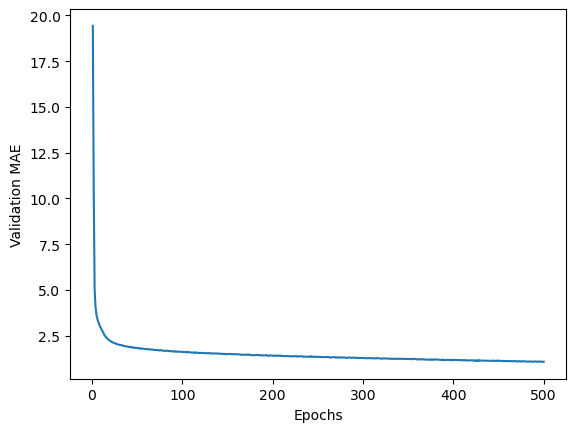

In [29]:
average_mae_history=[np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]
#plotting
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


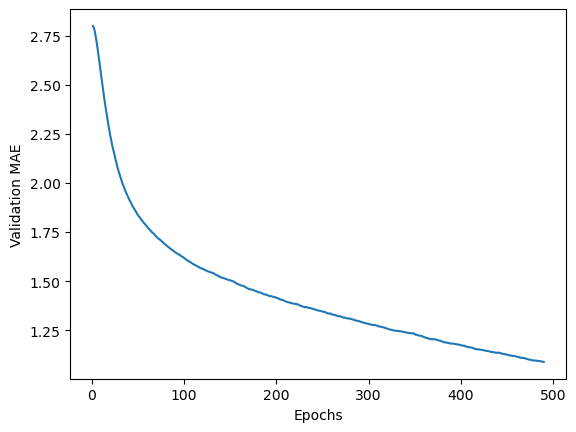

In [30]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1- factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history=smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [31]:
final_epoch=500
final_model=build_model()
final_model.fit(train_data,train_targets,epochs=final_epoch,batch_size=16,verbose=0)
mse,mae=model.evaluate(test_data,test_targets)
print("Mean Absolute Error: ",mae)

KeyboardInterrupt: 